# Python for Data Science Quiz

## This quiz is to test your understanding on the concepts learnt in class during the 
## Python for Data Science Course. 
## Background of the data - The dataset to be used for the quiz pertains to the 
## number of hospitalisations under the scheme Ayushman Bharat - Pradhan 
## Mantri Jan Arogya Yojana (AB-PMJAY), this data is as on 19 June, 2019.
## The data contains number of cases of hospitalisation in public and private hospitalisations 
## state/ UT wise and on an all India level.
## PMJAY is a scheme which provides health cover of Rs. 5 Lakhs per family per year, for 
## secondary and tertiary care hospitalization across public and private empaneled hospitals
## in India. State/UT contains the list of states and union territories, Public column contains
## hospitalisations in public hospitals and Private column contains list of hospitalisations in 
## private hospitals. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

## Question 1: Import the dataset.

In [2]:
df = pd.read_csv('hospitalisations.csv')

## Question 2: How many rows and columns does the data set have?

In [6]:
print(f'The data set as {df.shape[0]} rows and {df.shape[1]} columns')

The data set as 32 rows and 3 columns


## Question 3: Does the data set have missing values? If yes, how many?

In [10]:
df.isnull().sum()

State/UT    0
Private     2
Public      2
dtype: int64

## Question 4: Drop the NA values.

In [11]:
df.dropna(axis=0,inplace=True)

## Question 5: Create a new column Total which contains a sum of private and public
## hospitalisations. So the column Total should be a summation of the two columns
## Public and Private.

In [14]:
df["Total"]= df["Private"]+df["Public"]
df.head()

,State/UT,Private,Public,Total
0,Andaman and Nicobar Islands,1.0,21.0,22.0
1,Andhra Pradesh,97863.0,34385.0,132248.0
2,Arunachal Pradesh,5.0,630.0,635.0
3,Assam,14350.0,33553.0,47903.0
4,Bihar,11747.0,34814.0,46561.0


## Question 6: Which State or UT is the unhealthiest? (i.e. maximum number of hospitalisations) 
## HINT : Do not include Grand Total

In [29]:
df.sort_values(by='Total',ascending=False).head(2).iloc[1: ,0:1]

,State/UT
6,Chhattisgarh


## Question 7: Chhattisgarh accounts for roughly 18% share in the total hospitalisations in India (assuming these are the only states/UTs in India). True for False?

In [49]:
df[df["State/UT"] == 'Chhattisgarh']["Total"]

6    553937.0
Name: Total, dtype: float64

In [50]:
df[df["State/UT"] == 'Grand Total']["Total"]

31    2935313.0
Name: Total, dtype: float64

In [51]:
553937.0*100/2935313.0

18.87147980470907

## Question 8: In Dadra and Nagar Haveli, which type of hospitals do people prefer?

In [52]:
df[df['State/UT'] == 'Dadra and Nagar Haveli']

,State/UT,Private,Public,Total
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0


## Question 9: Plot the total hospitalisations in a plot of your choice and comment on the 
## healthiest State/UT. (Assuming that the only parameter for Healthiest is the number of 
## hospitalisations only)

<AxesSubplot:xlabel='Total', ylabel='State/UT'>

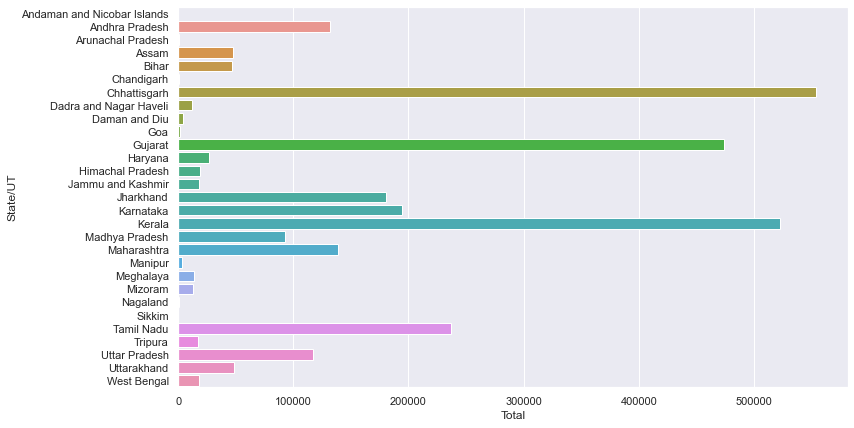

In [61]:
plt.figure(figsize=(12,7))
df1 = df.iloc[:-1,:]
df1
sns.barplot(y=df1['State/UT'],x=df1['Total'],data=df1.sort_values(by='Total'),orient='h')

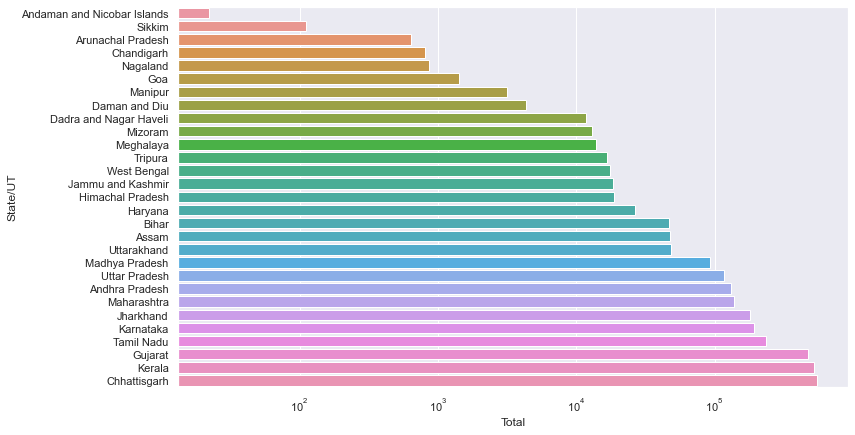

In [64]:
df2 = df1.sort_values(by='Total')
plt.figure(figsize=(12,7))
sns.barplot(y=df2['State/UT'],x=df2['Total'],data=df2,orient='h')
plt.xscale('log')

## Question 10: Public Hospitalisations are more on an all India level as compared to state/UT level. True or False? 
## HINT: Calculate the percentage of public hospitalisation (public/total), then find out the average percentage of all states using the mean() function. Compare this average percentage (state) with the grand total (all India) percentage and comment.

In [68]:
df['Public_Pct'] = df['Public']/df['Total']
df

,State/UT,Private,Public,Total,Public_Pct
0,Andaman and Nicobar Islands,1.0,21.0,22.0,0.954545
1,Andhra Pradesh,97863.0,34385.0,132248.0,0.260004
2,Arunachal Pradesh,5.0,630.0,635.0,0.992126
3,Assam,14350.0,33553.0,47903.0,0.700436
4,Bihar,11747.0,34814.0,46561.0,0.747707
5,Chandigarh,302.0,509.0,811.0,0.627620
6,Chhattisgarh,411814.0,142123.0,553937.0,0.256569
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0,0.933288
8,Daman and Diu,984.0,3343.0,4327.0,0.772591
9,Goa,1033.0,382.0,1415.0,0.269965


In [71]:
df1['Public_Pct'] = df1['Public']/df1['Total']
df1['Public_Pct'].mean()

<ipython-input-71-4e9c0e7061ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Public_Pct'] = df1['Public']/df1['Total']


0.590638596657387

## Question 11: Which States/UTs have more than 50000 hospitalisations?

In [73]:
df2[df2['Total'] > 50000].sort_values(by='Total',ascending=False)

,State/UT,Private,Public,Total
6,Chhattisgarh,411814.0,142123.0,553937.0
16,Kerala,131557.0,391079.0,522636.0
10,Gujarat,379379.0,94845.0,474224.0
26,Tamil Nadu,120473.0,116701.0,237174.0
15,Karnataka,65502.0,128640.0,194142.0
14,Jharkhand,156760.0,24114.0,180874.0
19,Maharashtra,107977.0,31179.0,139156.0
1,Andhra Pradesh,97863.0,34385.0,132248.0
28,Uttar Pradesh,89987.0,26800.0,116787.0
18,Madhya Pradesh,29314.0,63818.0,93132.0


## Question 12: Which state reported exactly 1 case of private hospitalisation?

In [76]:
df2[df2['Private']==1]['State/UT']

0    Andaman and Nicobar Islands
Name: State/UT, dtype: object

## Question 13: Which State/UT has maximum number of people admitted to public hospitals?

In [79]:
df2.sort_values(by='Public',ascending=False).head(1)

,State/UT,Private,Public,Total
16,Kerala,131557.0,391079.0,522636.0


## Question 14: Which state among Tripura and Gujarat witnessed more hospitalisations? 
## (in absolute numbers)

In [82]:
df2[df2['State/UT'] == 'Tripura']

,State/UT,Private,Public,Total
27,Tripura,90.0,16702.0,16792.0


In [83]:
df2[df2['State/UT'] == 'Gujarat']

,State/UT,Private,Public,Total
10,Gujarat,379379.0,94845.0,474224.0


## Question 15: Are there any extreme values/ outliers present in this data set? Do these
## values impact the analysis?

{'whiskers': [<matplotlib.lines.Line2D at 0x21c388a8310>,
 'caps': [<matplotlib.lines.Line2D at 0x21c388a89d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c38898f70>],
 'medians': [<matplotlib.lines.Line2D at 0x21c388b40d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c388b4430>],
 'means': []}

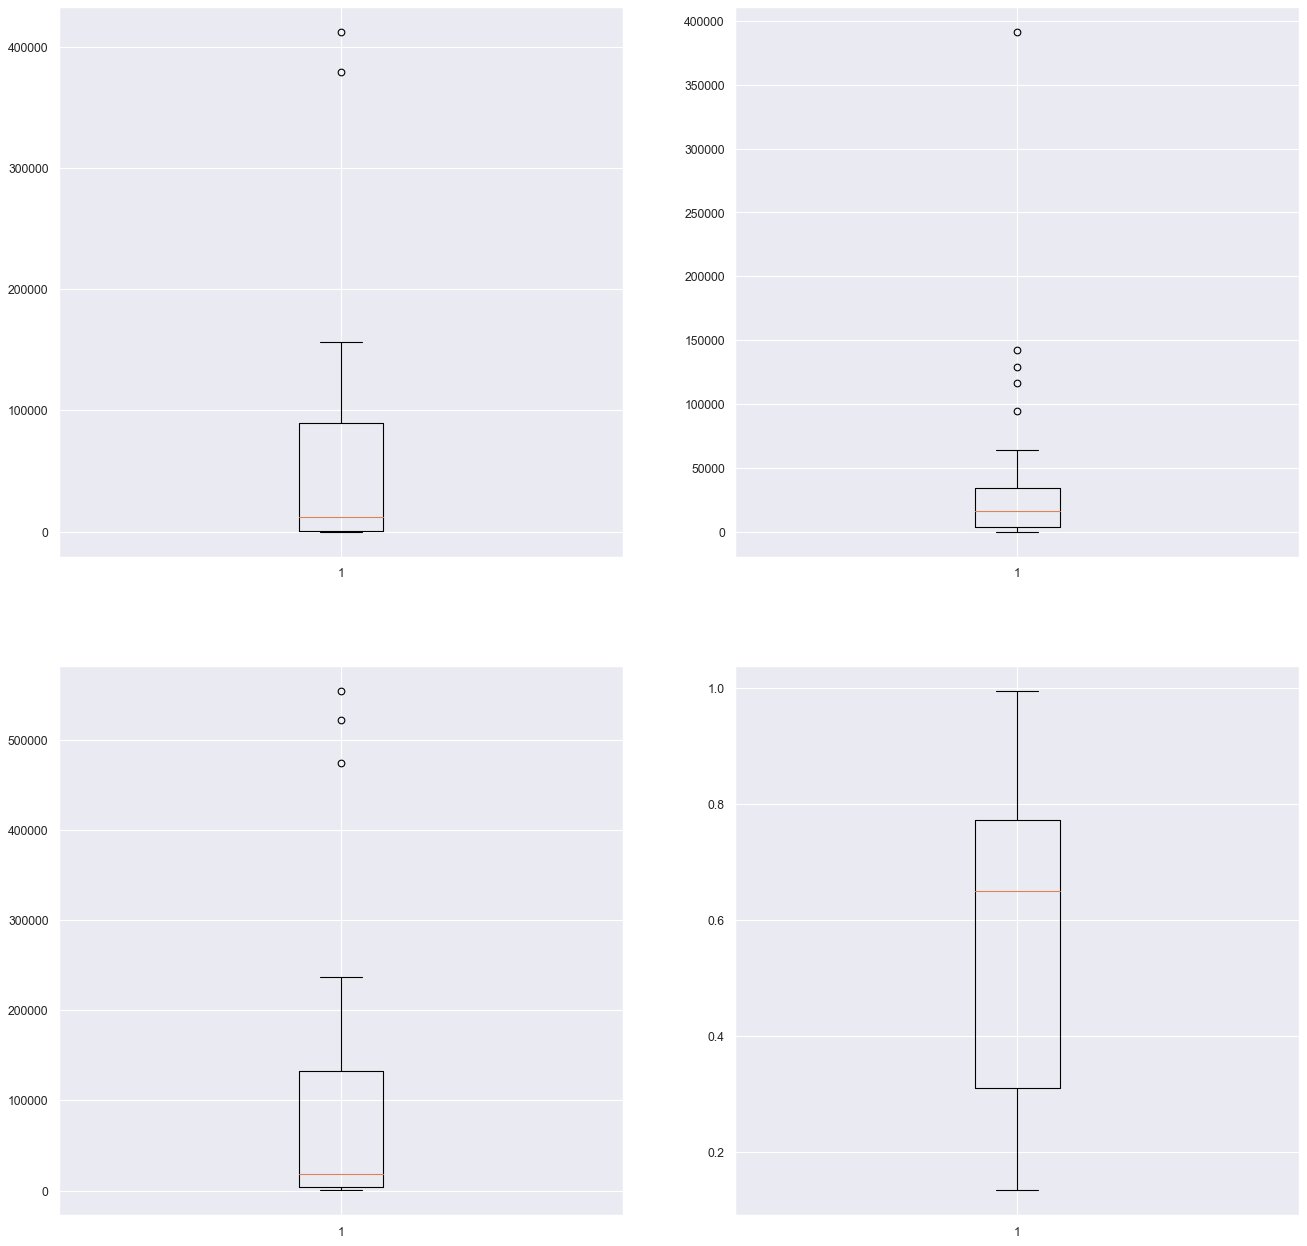

In [91]:
plt.figure(figsize=(20, 20), dpi=80)
plt.subplot(2,2,1)
plt.boxplot(df1['Private'])
plt.subplot(2,2,2)
plt.boxplot(df1['Public'])
plt.subplot(2,2,3)
plt.boxplot(df1['Total'])
plt.subplot(2,2,4)
plt.boxplot(df1['Public_Pct'])

THE END!